### Auren Calibration using the Tympan

Note: If using WSL to run Python in a virtual Linux environment, then you will need to attach the USB serial port to allow access from WSL.  
Follow: https://learn.microsoft.com/en-us/windows/wsl/connect-usb
- To list: usbipd list
- To bind: usbipd bind --busid <port #>
- To attach: usbipd attach --wsl --busid <port#>
- To detach: usbipd detach --busid <port #>

In [1]:
%matplotlib widget

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import os

In [3]:
# Local imports (may take 60sec to load)
from auren.core.calibrate import Calibrate
import auren.core.data_models as odm

In [4]:
cal = Calibrate(out_path='./calibrate')

In [5]:
# Save the calibration tones -- these should be copied onto the Tympan via MTP mode

# Create the tones
cal.save_cal_tones()

In [5]:
# Connect to the tympan (if running in a virtual environment (WSL), first attach the port with usbipd attach --wsl --busid 1-8)
cal.connect()
# Turn on "MTP Mode" so we can put the wav file on to the SD card
# cal.connect_sd() #NOT ON WLS PLEASE
# Put the PLAY1.WAV, PLAY2.WAV, and PLAY3.WAV files from the
# `calibration_tones` folder into the root folder of the Typman
# Once this is done, cycle power on the Tympan


Opened:  /dev/ttyACM1


In [7]:
cal.connect()   # Reconnect after turning back on

Opened:  /dev/ttyACM0


Exception in thread Thread-5 (read_rx_thread):
Traceback (most recent call last):
  File "/home/mpu/.pyenv/versions/3.11.2/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/home/mpu/.pyenv/versions/3.11.2/envs/auren/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "/home/mpu/.pyenv/versions/3.11.2/lib/python3.11/threading.py", line 975, in run
    self._target(*self._args, **self._kwargs)
  File "/mnt/c/Repositories/OpenHearing/open-hearing-hardware/auren/auren/core/tympan_serial.py", line 235, in read_rx_thread
    if self.port_h.in_waiting > 0:
       ^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mpu/.pyenv/versions/3.11.2/envs/auren/lib/python3.11/site-packages/serial/serialposix.py", line 549, in in_waiting
    s = fcntl.ioctl(self.fd, TIOCINQ, TIOCM_zero_str)
        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
OSError: [Errno 5] Input/output error


In [8]:
# Place the Auren into one end of the shortest calibration tube, and the MicW into the other end
cal.collect_mic_calibration_data(odm.tube_12mm)  # Tube 1

No Crash Data To Report
  Hopefully all is well, but certain types of crashes can't be reported:
	stuck in an infinite loop (technically, hardware still running properly)
	remaining in a low power sleep mode
	access to certain peripherals without their clock enabled (eg, FlexIO)
	change of CPU or bus clock speed without use of glitchless mux
DigMicProbeTest: setup():...
Sample Rate (Hz): 96000.00
Audio Block Size (samples): 128
SD configured for 4 channels.
Setup: complete.
SerialManager Help: Available Commands:
 General: No Prefix
   h    : Print this help
   w/W/e/E/o: INPUT  : Switch to the PCB Mics / Pink Jack - Mic Bias / Pink Jack Line in / Digital mics / Hybrid
   k/K  : CHIRP  : Incr/decrease loudness of chirp (cur = 0.0 dBFS)
   d/D  : CHIRP  : Incr/decrease duration of chirp (cur = 5.0 sec)
   n    : CHIRP  : Start the chirp
   1-3  : SDPlay : Play files 1-3 from SD Card
   q    : SDPlay : Stop any currently plying SD files
   b    : AutoWrite : Start chirp and SD recording 

In [9]:
# Great, now repeat with the other 3 tubes
cal.collect_mic_calibration_data(odm.tube_14p5mm)  # Tube 2


Received: Switch input to digital PDM mics
SerialManagerBase: sending: STATE=BTN:configPCB:0
SerialManagerBase: sending: STATE=BTN:configMIC:0
SerialManagerBase: sending: STATE=BTN:configLINE:0
SerialManagerBase: sending: STATE=BTN:configPDM:0
SerialManagerBase: sending: STATE=BTN:configMicJackPDM:0
SerialManagerBase: sending: STATE=BTN:configPDM:1
SerialManagerBase: sending: TEXT=BTN:inpGain:0.0


playing tone  durations=[5.0, 5.0] frequencies=[80.0, 1000.0, 21000.0] samplerate=96000 freq_units='Hz' time_units='s' channels=[True, True]
Success:  Received: start combination SD Playing and SD recording...
AudioSDWriter: Opened AUDIO003.WAV
serviceAudioSdStartStop: Starting SD 1 playback...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chi

In [10]:
cal.collect_mic_calibration_data(odm.tube_17p5mm)  # Tube 3


Received: Switch input to digital PDM mics
SerialManagerBase: sending: STATE=BTN:configPCB:0
SerialManagerBase: sending: STATE=BTN:configMIC:0
SerialManagerBase: sending: STATE=BTN:configLINE:0
SerialManagerBase: sending: STATE=BTN:configPDM:0
SerialManagerBase: sending: STATE=BTN:configMicJackPDM:0
SerialManagerBase: sending: STATE=BTN:configPDM:1
SerialManagerBase: sending: TEXT=BTN:inpGain:0.0


playing tone  durations=[5.0, 5.0] frequencies=[80.0, 1000.0, 21000.0] samplerate=96000 freq_units='Hz' time_units='s' channels=[True, True]
Success:  Received: start combination SD Playing and SD recording...
AudioSDWriter: Opened AUDIO005.WAV
serviceAudioSdStartStop: Starting SD 1 playback...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chi

In [11]:
cal.collect_mic_calibration_data(odm.tube_20mm)  # Tube 4


Received: Switch input to digital PDM mics
SerialManagerBase: sending: STATE=BTN:configPCB:0
SerialManagerBase: sending: STATE=BTN:configMIC:0
SerialManagerBase: sending: STATE=BTN:configLINE:0
SerialManagerBase: sending: STATE=BTN:configPDM:0
SerialManagerBase: sending: STATE=BTN:configMicJackPDM:0
SerialManagerBase: sending: STATE=BTN:configPDM:1
SerialManagerBase: sending: TEXT=BTN:inpGain:0.0


playing tone  durations=[5.0, 5.0] frequencies=[80.0, 1000.0, 21000.0] samplerate=96000 freq_units='Hz' time_units='s' channels=[True, True]
Success:  Received: start combination SD Playing and SD recording...
AudioSDWriter: Opened AUDIO007.WAV
serviceAudioSdStartStop: Starting SD 1 playback...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chirp or SD is still playing...
serviceChirpStartStop: Chi

In [12]:
# Speaker calibration data
cal.collect_speaker_calibration_data(odm.simulator_1p26cc)


Received: Switch input to digital PDM mics
SerialManagerBase: sending: STATE=BTN:configPCB:0
SerialManagerBase: sending: STATE=BTN:configMIC:0
SerialManagerBase: sending: STATE=BTN:configLINE:0
SerialManagerBase: sending: STATE=BTN:configPDM:0
SerialManagerBase: sending: STATE=BTN:configMicJackPDM:0
SerialManagerBase: sending: STATE=BTN:configPDM:1
SerialManagerBase: sending: TEXT=BTN:inpGain:0.0


playing tone  durations=[5.0] frequencies=[80.0, 21000.0] samplerate=96000 freq_units='Hz' time_units='s' channels=[True, False]
Results saved in  AUDIO009.WAV

playing tone  durations=[5.0] frequencies=[80.0, 21000.0] samplerate=96000 freq_units='Hz' time_units='s' channels=[False, True]
Results saved in  AUDIO010.WAV


In [15]:
# Save the intermin state of the entire calibration object so that we can restore from here if needed
with open(os.path.join(cal.out_path, "rawdata.json"), "w", encoding="utf-8") as fid:
    fid.write(cal.raw_data.model_dump_json())

In [16]:
import json
with open(os.path.join(cal.out_path, "rawdata.json"), "r", encoding="utf-8") as fid:
    raw_data = json.loads(fid.read())
    raw_data["data"] = []
    raw_data["data_ref"] = []
    raw_data = odm.RawCalibrationData(**raw_data)
cal.raw_data = raw_data


In [ ]:
# As an interim part of the process we need to get the files off the Tympan
# 1. Cycle the power on the Tympan, (reattach if using WSL2), then run this cell
cal.connect()
# cal.connect_sd() # NOT ON WSL PLEASE
# 2. Use an explorer window to drag the files `AUDIO*.WAV` into the `calibration_data` folder


In [ ]:
# 3. Cycle the power on the Tympan, then reconnnect
cal.connect()

In [17]:
cal.raw_data.file_meta_data_ref

[FileMetaData(name='./calibrate/calibration_data/AUDIO002.WAV', tube=TubeGeometry(units='mm', type='closed', length=12.0, interior_diameter=3.4, probe_locations=[12.0]), tone=Chirp(durations=[5.0, 5.0], frequencies=[80.0, 1000.0, 21000.0], samplerate=96000, freq_units='Hz', time_units='s', channels=[True, True]), used_for='mic'),
 FileMetaData(name='./calibrate/calibration_data/AUDIO004.WAV', tube=TubeGeometry(units='mm', type='closed', length=14.5, interior_diameter=3.4, probe_locations=[14.5]), tone=Chirp(durations=[5.0, 5.0], frequencies=[80.0, 1000.0, 21000.0], samplerate=96000, freq_units='Hz', time_units='s', channels=[True, True]), used_for='mic'),
 FileMetaData(name='./calibrate/calibration_data/AUDIO006.WAV', tube=TubeGeometry(units='mm', type='closed', length=17.5, interior_diameter=3.4, probe_locations=[17.5]), tone=Chirp(durations=[5.0, 5.0], frequencies=[80.0, 1000.0, 21000.0], samplerate=96000, freq_units='Hz', time_units='s', channels=[True, True]), used_for='mic'),
 Fil

In [18]:
# Load the wav recordings
cal.raw_data.load_wav(auren_files=cal.raw_data.file_meta_data, ref_files=cal.raw_data.file_meta_data_ref) 

Done loading data.


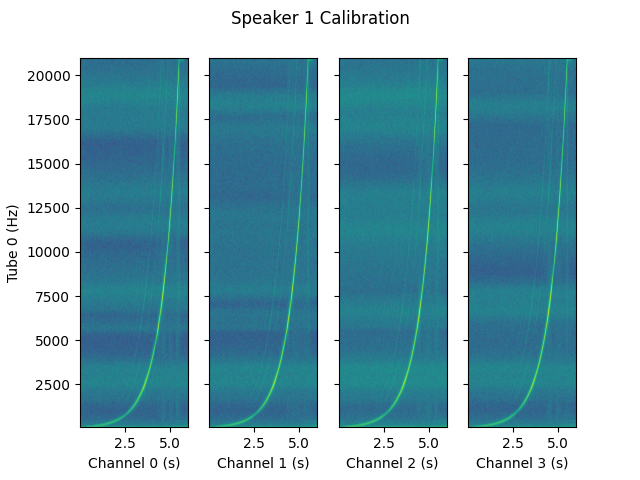

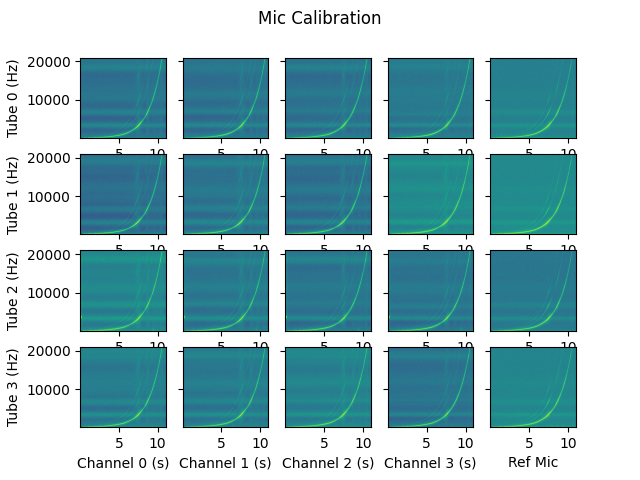

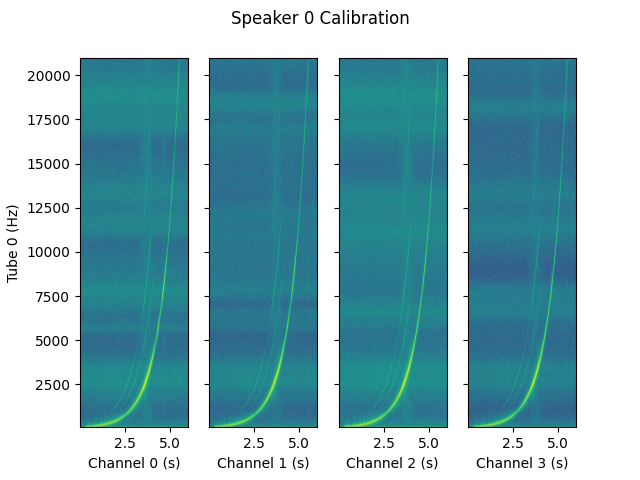

In [19]:
# To make sure everything worked, let's plot the data
cal.plot_calibration_data()

In [20]:
# Now we can run the calibration routines
cal.calibrate()


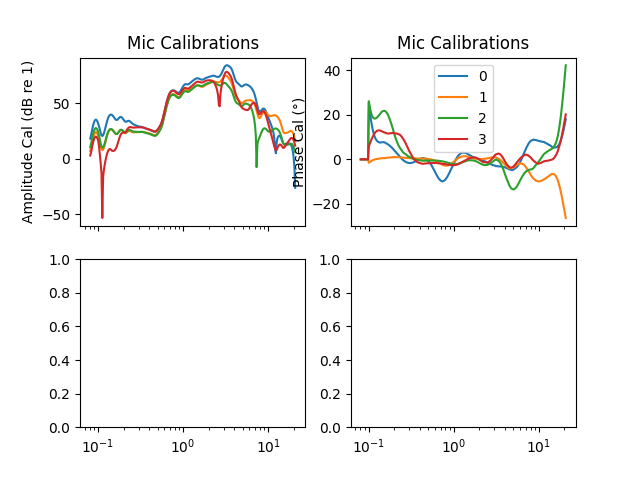

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


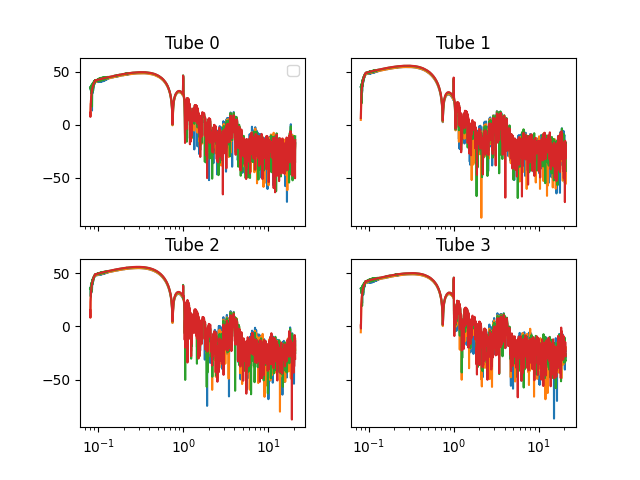

AttributeError: 'Calibrate' object has no attribute 'save_calibration'

In [21]:
# MISSING METHODS!!!!
cal.plot_calibration()
cal.plot_calibration_checks()
cal.save_calibration()

In [ ]:
# Finally collect some validation data to make sure everything works as expected.
cal.connect()
cal.collect_validation_data(odm.simulator_1p26cc)
cal.collect_validation_data(odm.simulator_2cc)

In [ ]:
# As an interim part of the process we need to get the files off the Tympan
# 1. Cycle the power on the Tympan, then run this cell
cal.connect()
cal.connect_sd()
# 2. Use an explorer window to drag the files `AUDIO*.WAV` into the `validation_data` folder
# 3. Cycle the power on the Tympan

In [ ]:
# Finally, plot the validation data
cal.plot_validation()

In [ ]:
# Validate MicW calibration 
# Use 
cal.calibrateAnalogMic()